In [26]:
# Importing packages and libraries
import os 
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # Required for plotting
import matplotlib.pyplot as plt # Required for plotting
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

# Data Pre-processing and Anomaly Detection

In [27]:
gender_sub = pd.read_csv("gender_submission.csv")
titan_train = pd.read_csv("train.csv")
titan_test = pd.read_csv("test.csv")

In [30]:
print("Total rows present = ", len(titan_train))
titan_train.head(5)

Total rows present =  891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
print("Total rows present = ", len(titan_test))
titan_test.head(5)

Total rows present =  418


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
titan_train_cl = titan_train  
y_train = titan_train_cl.Survived
titan_train_cl.drop(['Survived'], axis = 1, inplace = True) # Dropping extra column
titan_train_cl.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
merged_data = pd.concat([titan_train_cl,titan_test], axis = 0, ignore_index= True)
print("Total rows present = ", len(merged_data))
merged_data.head(5)

Total rows present =  1309


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [34]:
merged_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [35]:
merged_data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [36]:
# Converting all Nulls to N/A
merged_data['Cabin'].fillna('N/A', inplace = True)

In [37]:
cabin_distr = merged_data.groupby("Cabin").size().sort_values(ascending = False)
cabin_distr

Cabin
N/A                1014
C23 C25 C27           6
G6                    5
B57 B59 B63 B66       5
B96 B98               4
                   ... 
B82 B84               1
B80                   1
B79                   1
B73                   1
T                     1
Length: 187, dtype: int64

In [38]:
merged_data['Embarked'].fillna((merged_data['Embarked'].mode()[0]), inplace = True)

In [ ]:
merged_data['Age'].fillna((merged_data['Age'].median()), inplace = True)

In [ ]:
merged_data['Fare'].fillna((merged_data['Fare'].mean()), inplace = True)

In [ ]:
merged_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [43]:
age_anom_check = merged_data.query("Age % 1 != 0")
print("Number of Age anomalous cases:", len(age_anom_check))
#age_anom_check

Number of Age anomalous cases: 308


In [40]:
def age_treatment(Age):# Creating a user-defined function for treating Age
  Age_mod=[]
  if Age < 1:
    Age_mod=str(Age).split('.')[1]
    Age_mod= int(Age_mod)
  else:
    Age_mod=int(Age)
  return Age_mod
    

In [44]:
age_manipulated = [age_treatment(Age) for Age in merged_data.Age] # Function call
age_manipulated

value = merged_data # Cloning merged_data to avoid data tampering

value.insert(3, "Age_mod", age_manipulated) # Adding new column in data-set
value.head()

ValueError: ignored

In [ ]:
value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        1309 non-null   object 
 10  Embarked     1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [ ]:
age_anom_valid = value.query("Age % 1 != 0") # Checking Age with decimal points
print("Number of Age anomalous cases:", len(age_anom_valid))

Number of Age anomalous cases: 45


In [ ]:
age_validation = value.query("Age_mod % 1 != 0")
print("Number of anomalous age data points = ", len(age_validation))

UndefinedVariableError: ignored

In [ ]:
titan_ads = value.drop(["Age"], axis = 1)
titan_ads.rename(columns={'Age_mod': 'Age'}, inplace=True)
titan_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Age          1309 non-null   int64  
 4   Sex          1309 non-null   object 
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        1309 non-null   object 
 10  Embarked     1309 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 112.6+ KB


In [ ]:
titan_fixed_train=pd.concat([titan_ads.sort_index().iloc[:891],y_train],axis=1)
titan_fixed_train.tail()

,PassengerId,Pclass,Name,Age,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
886,887,2,"Montvila, Rev. Juozas",27,male,0,0,211536,13.00,N/A,S,0
887,888,1,"Graham, Miss. Margaret Edith",19,female,0,0,112053,30.00,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",28,female,1,2,W./C. 6607,23.45,N/A,S,0
889,890,1,"Behr, Mr. Karl Howell",26,male,0,0,111369,30.00,C148,C,1
890,891,3,"Dooley, Mr. Patrick",32,male,0,0,370376,7.75,N/A,Q,0


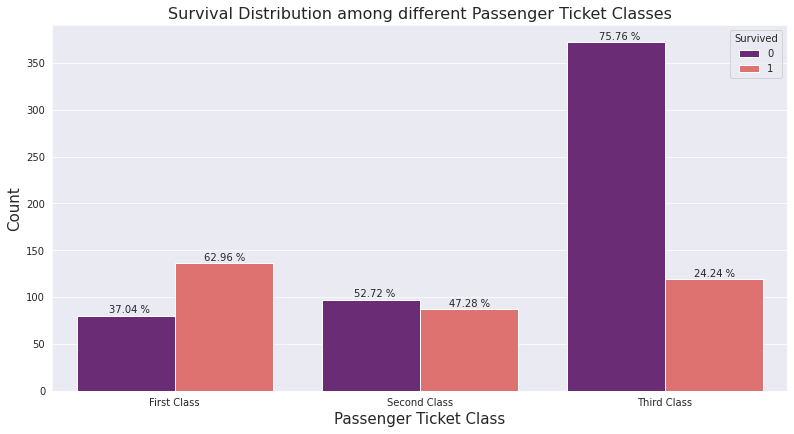

In [ ]:
# Relationship between Survival and Ticket Class 

# Creating onject containing Ticket distribution
feature_pc = titan_fixed_train.groupby(by = 'Pclass')['Survived'].value_counts()

# Declaring figure size
plt.figure(figsize = (10, 5))

# Declaring color parameters
sns.countplot(data = titan_fixed_train, x = 'Pclass',  hue = 'Survived', palette = 'magma')

# Customised percentage labels for each instance

plt.text(x = -0.27, y = feature_pc[1][0] + 3, s = "{} %".format(((feature_pc[1][0]/feature_pc[1].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12, y = feature_pc[1][1] + 3, s = "{} %".format(((feature_pc[1][1]/feature_pc[1].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.27 + 1, y = feature_pc[2][0] + 3, s = "{} %".format(((feature_pc[2][0]/feature_pc[2].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12 + 1, y = feature_pc[2][1] + 3, s = "{} %".format(((feature_pc[2][1]/feature_pc[2].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.27 + 2, y = feature_pc[3][0] + 3, s = "{} %".format(((feature_pc[3][0]/feature_pc[3].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12 + 2, y = feature_pc[3][1] + 3, s = "{} %".format(((feature_pc[3][1]/feature_pc[3].sum())*100).round(2)), fontsize = 10)

# Plot title:
plt.title('Survival Distribution among different Passenger Ticket Classes', fontsize = 16)

# Label Editing

plt.xticks([0, 1, 2], ['First Class', 'Second Class', 'Third Class'], fontsize = 10)
plt.xlabel('Passenger Ticket Class', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# Padding
plt.tight_layout(pad = -3)

# SHow graph
plt.show()

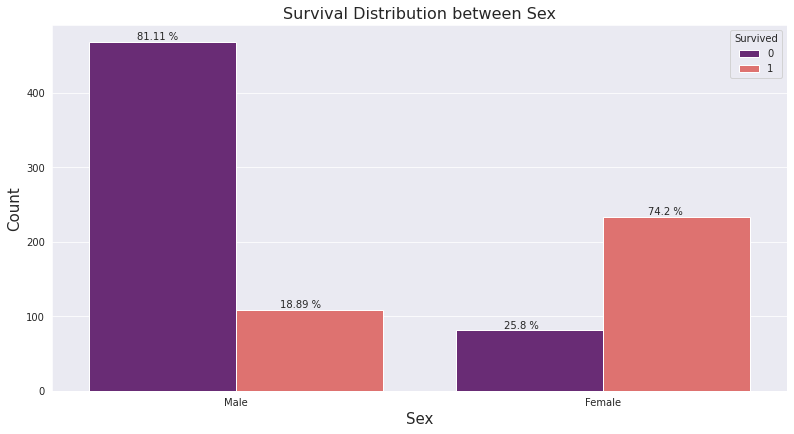

In [ ]:
# Relationship between Survival and Sex 

# Creating onject containing Sex distribution
feature_sex = titan_fixed_train.groupby(by = 'Sex')['Survived'].value_counts()

# Declaring figure size
plt.figure(figsize = (10, 5))

# Declaring color parameters
sns.countplot(data = titan_fixed_train, x = 'Sex',  hue = 'Survived', palette = 'magma')

# Customised percentage labels for each instance

plt.text(x = -0.27, y = feature_sex['male'][0] + 3, s = "{} %".format(((feature_sex['male'][0]/feature_sex['male'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12, y = feature_sex['male'][1] + 3, s = "{} %".format(((feature_sex['male'][1]/feature_sex['male'].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.27 + 1, y = feature_sex['female'][0] + 3, s = "{} %".format(((feature_sex['female'][0]/feature_sex['female'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12 + 1, y = feature_sex['female'][1] + 3, s = "{} %".format(((feature_sex['female'][1]/feature_sex['female'].sum())*100).round(2)), fontsize = 10)

# Plot title:
plt.title('Survival Distribution between Sex', fontsize = 16)

# Label Editing

plt.xticks([0, 1], ['Male', 'Female'], fontsize = 10)
plt.xlabel('Sex', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# Padding
plt.tight_layout(pad = -3)

# SHow graph
plt.show()



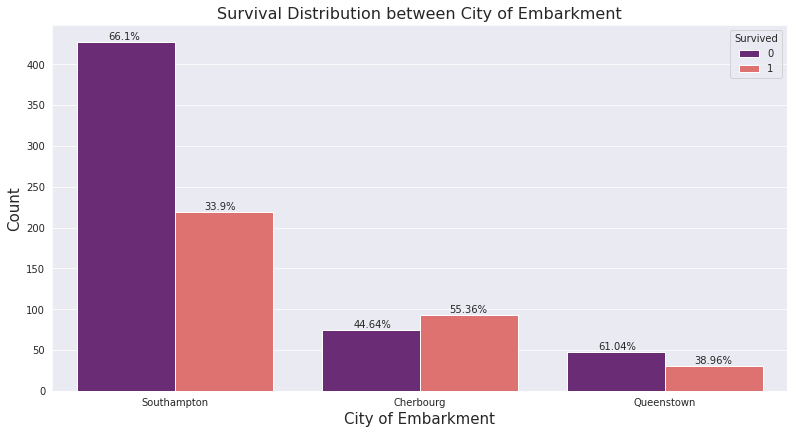

In [ ]:
# Relationship between Survival and Embarked 

# Creating onject containing Embarked distribution
feature_embarked = titan_fixed_train.groupby(by = 'Embarked')['Survived'].value_counts()

# Declaring figure size
plt.figure(figsize = (10, 5))

# Declaring color parameters
sns.countplot(data = titan_fixed_train, x = 'Embarked',  hue = 'Survived', palette = 'magma')

# Customised percentage labels for each instance

plt.text(x = -0.27, y = feature_embarked['S'][0] + 3, s = "{}%".format(((feature_embarked['S'][0]/feature_embarked['S'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12, y = feature_embarked['S'][1] + 3, s = "{}%".format(((feature_embarked['S'][1]/feature_embarked['S'].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.27 + 1, y = feature_embarked['C'][0] + 3, s = "{}%".format(((feature_embarked['C'][0]/feature_embarked['C'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12 + 1, y = feature_embarked['C'][1] + 3, s = "{}%".format(((feature_embarked['C'][1]/feature_embarked['C'].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.27 + 2, y = feature_embarked['Q'][0] + 3, s = "{}%".format(((feature_embarked['Q'][0]/feature_embarked['Q'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12 + 2, y = feature_embarked['Q'][1] + 3, s = "{}%".format(((feature_embarked['Q'][1]/feature_embarked['Q'].sum())*100).round(2)), fontsize = 10)

# Plot title:
plt.title('Survival Distribution between City of Embarkment', fontsize = 16)

# Label Editing

plt.xticks([0, 1, 2], ['Southampton', 'Cherbourg', 'Queenstown'], fontsize = 10)
plt.xlabel('City of Embarkment', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# Padding
plt.tight_layout(pad = -3)

# SHow graph
plt.show()

In [ ]:
feature_cabin = titan_fixed_train.groupby(by = 'Cabin').size().sort_values(ascending = False)
feature_cabin

Cabin
N/A            687
G6               4
C23 C25 C27      4
B96 B98          4
E101             3
              ... 
C103             1
C101             1
B94              1
B86              1
T                1
Length: 148, dtype: int64

Observation:


*   As there are too many categorical values in cabin, no relation can be deduced w.r.t Survival

*   Next Step: We can create a binary column with availability of cabin information as the number of N/A values are quite too high

In [ ]:
titan_ads['Cabin'] = ['Present' if cabin != 'N/A' else 'Not Present' for cabin in titan_ads.Cabin]
titan_ads.head(5)

,Pclass,AgeGroup,FamilyGroup,Sex,Cabin,Embarked
0,3,Adult,Medium,male,Not Present,S
1,1,Adult,Medium,female,Present,C
2,3,Adult,Single,female,Not Present,S
3,1,Adult,Medium,female,Present,S
4,3,Adult,Single,male,Not Present,S


In [ ]:
feature_cabin = titan_ads.groupby(by = 'Cabin').size().sort_values(ascending = False)
feature_cabin

Cabin
Not Present    1014
Present         295
dtype: int64

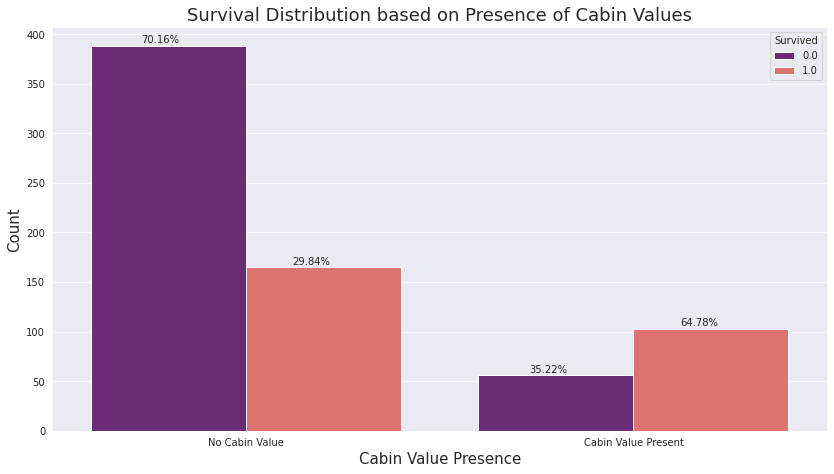

In [ ]:
# Relationship between Survival and Presence of Cabin 
train_collated = pd.concat([titan_ads.sort_index().iloc[:891], y_train], axis = 1)
cabSurvival = train_collated.groupby(by = 'Cabin')['Survived'].value_counts()

plt.figure(figsize = (10, 5))
sns.countplot(data = train_collated, x = 'Cabin',  hue = 'Survived', palette = 'magma')

plt.text(x = -0.27, y = cabSurvival['Not Present'][0] + 3, s = "{}%".format(((cabSurvival['Not Present'][0]/cabSurvival['Not Present'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12, y = cabSurvival['Not Present'][1] + 3, s = "{}%".format(((cabSurvival['Not Present'][1]/cabSurvival['Not Present'].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.27 + 1, y = cabSurvival['Present'][0] + 3, s = "{}%".format(((cabSurvival['Present'][0]/cabSurvival['Present'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12 + 1, y = cabSurvival['Present'][1] + 3, s = "{}%".format(((cabSurvival['Present'][1]/cabSurvival['Present'].sum())*100).round(2)), fontsize = 10)

plt.title('Survival Distribution based on Presence of Cabin Values', fontsize = 18)
plt.xticks([0, 1], ['No Cabin Value', 'Cabin Value Present'], fontsize = 10)

plt.xlabel('Cabin Value Presence', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.tight_layout(pad = -5)
plt.show()

In [ ]:
#Visualising the fare distribution w.r.t survival:
plt.figure(figsize = (16, 9))
sns.histplot(x = 'Fare', data = train_collated, hue = 'Survived', multiple = 'stack', palette = 'magma')
plt.xlabel('Fare', fontsize = 18)
plt.ylabel('Count', fontsize = 15)
plt.show()

ValueError: ignored

<Figure size 1152x648 with 0 Axes>

In [ ]:
#Calculating the quartiles of 'Fare':

Q1 = titan_ads.Fare.quantile(0.25)
Q2 = titan_ads.Fare.quantile(0.50)
Q3 = titan_ads.Fare.quantile(0.75)

print("\n'Very Low Fare' Range:", 0, "-", Q1.round(2))
print("\n'Low Fare' Range:", Q1.round(2), "-", Q2.round(2))
print("\n'Medium Fare' Range:", Q2.round(2), "-", Q3.round(2))
print("\n'High Fare' Range:", Q3, "-", round(max(titan_ads.Fare), 2), '\n\n')

#Creating fare groups
titan_ads.insert(10, 'FareGroup', np.nan)

titan_ads.loc[(titan_ads.Fare <= Q1), 'FareGroup'] = 'VeryLowFare'
titan_ads.loc[(titan_ads.Fare > Q1) & (titan_ads.Fare <= Q2), 'FareGroup'] = 'LowFare'
titan_ads.loc[(titan_ads.Fare > Q2) & (titan_ads.Fare <= Q3), 'FareGroup'] = 'MediumFare'
titan_ads.loc[(titan_ads.Fare > Q3), 'FareGroup'] = 'HighFare'

titan_ads

AttributeError: ignored

In [ ]:
# Relationship between Survival and Fare Groups 

train_collated = pd.concat([titan_ads.sort_index().iloc[:891], y_train], axis = 1)
fgSurvival = train_collated.groupby(by = 'FareGroup')['Survived'].value_counts()

plt.figure(figsize = (10, 5))
sns.countplot(data = train_collated, x = 'FareGroup',  hue = 'Survived', order = ['VeryLowFare', 'LowFare', 'MediumFare', 'HighFare'], palette = 'magma')

plt.text(x = -0.30, y = fgSurvival['VeryLowFare'][0] + 2, s = "{}%".format(((fgSurvival['VeryLowFare'][0]/fgSurvival['VeryLowFare'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.08, y = fgSurvival['VeryLowFare'][1] + 2, s = "{}%".format(((fgSurvival['VeryLowFare'][1]/fgSurvival['VeryLowFare'].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.30 + 1, y = fgSurvival['LowFare'][0] + 2, s = "{}%".format(((fgSurvival['LowFare'][0]/fgSurvival['LowFare'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.08 + 1, y = fgSurvival['LowFare'][1] + 2, s = "{}%".format(((fgSurvival['LowFare'][1]/fgSurvival['LowFare'].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.30 + 2, y = fgSurvival['MediumFare'][0] + 2, s = "{}%".format(((fgSurvival['MediumFare'][0]/fgSurvival['MediumFare'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.08 + 2, y = fgSurvival['MediumFare'][1] + 2, s = "{}%".format(((fgSurvival['MediumFare'][1]/fgSurvival['MediumFare'].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.30 + 3, y = fgSurvival['HighFare'][0] + 2, s = "{}%".format(((fgSurvival['HighFare'][0]/fgSurvival['HighFare'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.08 + 3, y = fgSurvival['HighFare'][1] + 2, s = "{}%".format(((fgSurvival['HighFare'][1]/fgSurvival['HighFare'].sum())*100).round(2)), fontsize = 10)

plt.xlabel('Fare Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.xticks([0, 1, 2, 3], ['Very Low Fare', 'Low Fare', 'Medium Fare', 'High Fare'], fontsize = 10)
plt.title('Survival Distribution among different Fare Groups', fontsize = 16)

plt.tight_layout(pad = -5)
plt.show()

KeyError: ignored

ValueError: ignored

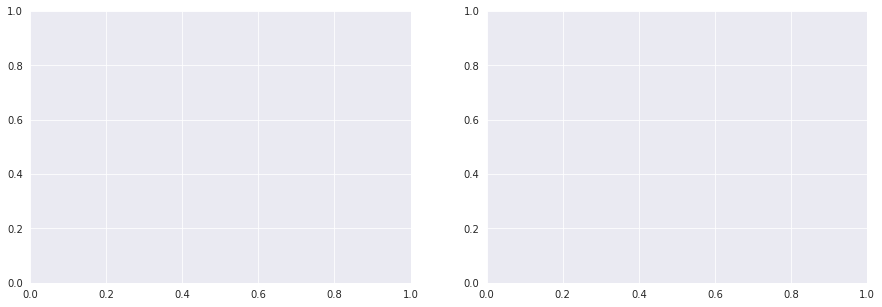

In [ ]:
train_collated = pd.concat([titan_ads.sort_index().iloc[:891], y_train], axis = 1) # Adding Survived Column in train dataset for Comaparison
cols = ['Parch', 'SibSp']

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

for col, subplot in zip(cols, ax.flatten()):
    sns.countplot(data = train_collated, x = col,  hue = 'Survived', ax = subplot, palette = 'magma')
    subplot.legend(loc = 'upper right', title = 'Survived')
    
plt.show()


In [ ]:
#Creating FamilyCount out of Parch and SibSp:
titan_ads['FamilyCount'] = 1 + titan_ads['SibSp'] + titan_ads['Parch'] ## Passenger + Parents + Sibilings_Spose
titan_ads.head(5)

,PassengerId,Pclass,Name,Age,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,3,"Braund, Mr. Owen Harris",22,male,1,0,A/5 21171,7.2500,N/A,S,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,female,1,0,PC 17599,71.2833,C85,C,2
2,3,3,"Heikkinen, Miss. Laina",26,female,0,0,STON/O2. 3101282,7.9250,N/A,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,female,1,0,113803,53.1000,C123,S,2
4,5,3,"Allen, Mr. William Henry",35,male,0,0,373450,8.0500,N/A,S,1


In [ ]:
#Visualising number of family members w.r.t survival:
train_collated = pd.concat([titan_ads.sort_index().iloc[:891], y_train], axis = 1)
plt.figure(figsize = (12, 4))
sns.countplot(data = train_collated, x = 'FamilyCount', hue = 'Survived', palette = 'magma')
plt.legend(loc = 'upper right', title = 'Survived')
plt.show()


In [ ]:
def familygroupcreation(FG): # Creating a user-defined function for creating Family buckets
    FamilyGroup = [] # Array declartion
    if FG == 1 : 
        FamilyGroup = "Single" 
    if FG > 1 and FG < 5 : 
        FamilyGroup = "Medium"       
    if FG >= 5 :
        FamilyGroup = "Large"

    return FamilyGroup

Family_Group = [familygroupcreation(FG) for FG in titan_ads.FamilyCount] # Function call


titan_ads.insert(3, "FamilyGroup", Family_Group) # Adding new column in data-set

Family_Group_distr = titan_ads.groupby("FamilyGroup").size().sort_values(ascending = False)
Family_Group_distr

FamilyGroup
Single    790
Medium    437
Large      82
dtype: int64

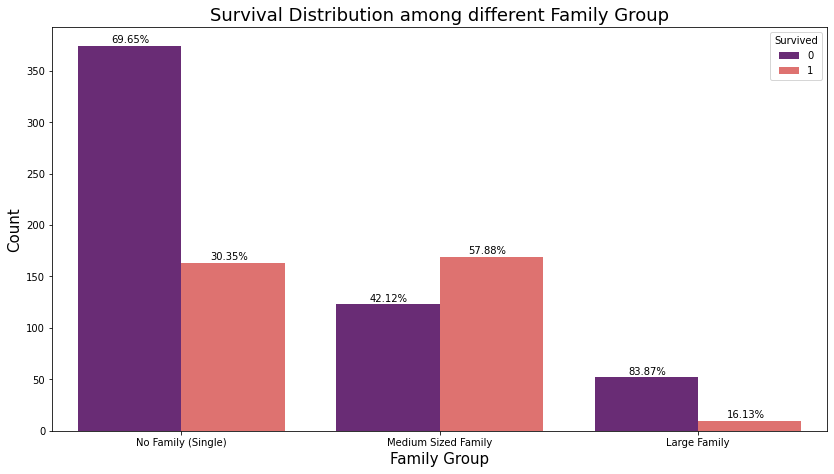

In [ ]:
# Relationship between Survival and Family Groups 


train_collated = pd.concat([titan_ads.sort_index().iloc[:891], y_train], axis = 1)
fsSurvival = train_collated.groupby(by = 'FamilyGroup')['Survived'].value_counts()

plt.figure(figsize = (10, 5))
sns.countplot(data = train_collated, x = 'FamilyGroup', hue = 'Survived', order = ['Single', 'Medium', 'Large'], palette = 'magma')

plt.text(x = -0.27, y = fsSurvival['Single'][0] + 3, s = "{}%".format(((fsSurvival['Single'][0]/fsSurvival['Single'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.11, y = fsSurvival['Single'][1] + 3, s = "{}%".format(((fsSurvival['Single'][1]/fsSurvival['Single'].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.27 + 1, y = fsSurvival['Medium'][0] + 3, s = "{}%".format(((fsSurvival['Medium'][0]/fsSurvival['Medium'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.11 + 1, y = fsSurvival['Medium'][1] + 3, s = "{}%".format(((fsSurvival['Medium'][1]/fsSurvival['Medium'].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.27 + 2, y = fsSurvival['Large'][0] + 3, s = "{}%".format(((fsSurvival['Large'][0]/fsSurvival['Large'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.11 + 2, y = fsSurvival['Large'][1] + 3, s = "{}%".format(((fsSurvival['Large'][1]/fsSurvival['Large'].sum())*100).round(2)), fontsize = 10)

plt.xlabel('Family Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.xticks([0, 1, 2], ['No Family (Single)', 'Medium Sized Family', 'Large Family'], fontsize = 10)
plt.title('Survival Distribution among different Family Group', fontsize = 18)

plt.tight_layout(pad = -5)
plt.show()

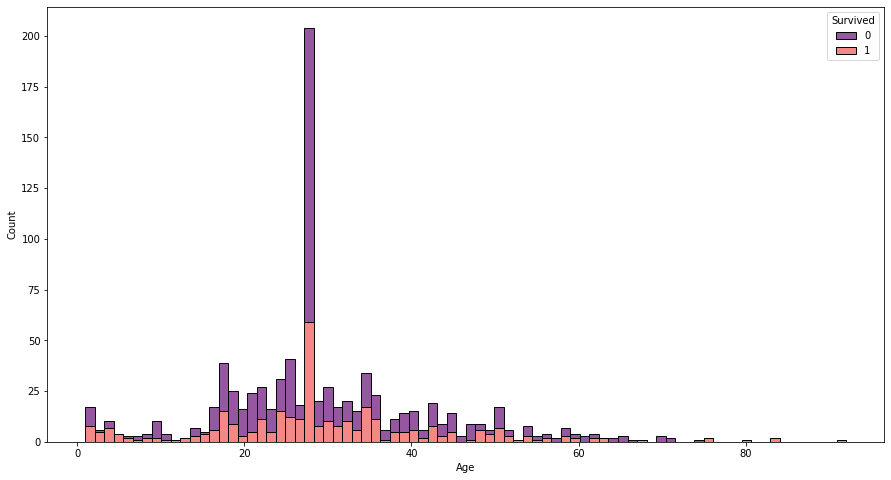

In [ ]:
train_collated = pd.concat([titan_ads.sort_index().iloc[:891], y_train], axis = 1)

plt.figure(figsize = (15, 8))
sns.histplot(data = train_collated, x = 'Age', hue = 'Survived', multiple = 'stack', bins = 80, palette = 'magma')
plt.show()

In [ ]:
def age_bucket(AG): # Creating a user-defined function for creating Age buckets
    AgeGroup = [] # Array declartion
    if AG > 0 and AG <= 18 : 
        AgeGroup = "Young" 
    if AG > 18 and AG <= 60 : 
        AgeGroup = "Adult"       
    if AG > 60 :
        AgeGroup = "Old"

    return AgeGroup

Age_Group = [age_bucket(AG) for AG in titan_ads.Age] # Function call


titan_ads.insert(3, "AgeGroup", Age_Group) # Adding new column in data-set

Age_Group_distr = titan_ads.groupby("AgeGroup").size().sort_values(ascending = False)
Age_Group_distr

AgeGroup
Adult    1083
Young     185
Old        41
dtype: int64

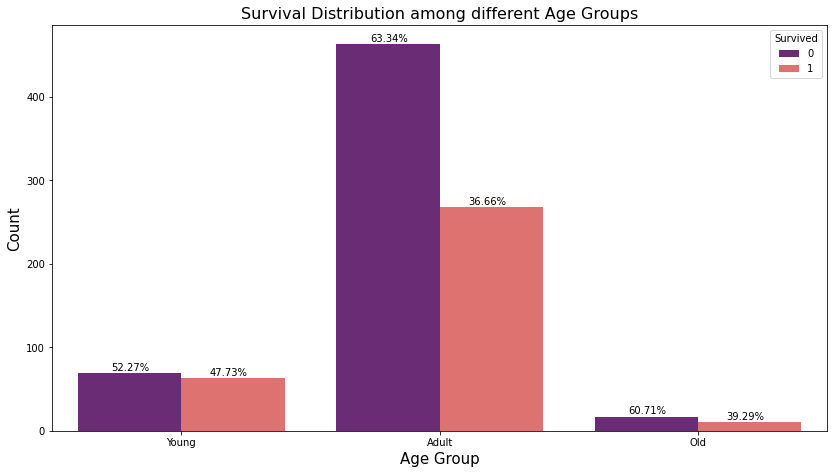

In [ ]:
# Relationship between Survival and Age Groups 

train_collated = pd.concat([titan_ads.sort_index().iloc[:891], y_train], axis = 1)
agSurvival = train_collated.groupby(by = 'AgeGroup')['Survived'].value_counts()

plt.figure(figsize = (10, 5))
sns.countplot(data = train_collated, x = 'AgeGroup', hue = 'Survived', order = ['Young', 'Adult', 'Old'], palette = 'magma')

plt.text(x = -0.27, y = agSurvival['Young'][0] + 3, s = "{}%".format(((agSurvival['Young'][0]/agSurvival['Young'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.11, y = agSurvival['Young'][1] + 3, s = "{}%".format(((agSurvival['Young'][1]/agSurvival['Young'].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.27 + 1, y = agSurvival['Adult'][0] + 3, s = "{}%".format(((agSurvival['Adult'][0]/agSurvival['Adult'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.11 + 1, y = agSurvival['Adult'][1] + 3, s = "{}%".format(((agSurvival['Adult'][1]/agSurvival['Adult'].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.27 + 2, y = agSurvival['Old'][0] + 3, s = "{}%".format(((agSurvival['Old'][0]/agSurvival['Old'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.11 + 2, y = agSurvival['Old'][1] + 3, s = "{}%".format(((agSurvival['Old'][1]/agSurvival['Old'].sum())*100).round(2)), fontsize = 10)

plt.xlabel('Age Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.xticks([0, 1, 2], ['Young', 'Adult', 'Old'], fontsize = 10)
plt.title('Survival Distribution among different Age Groups', fontsize = 16)

plt.tight_layout(pad = -5)
plt.show()

In [ ]:
titan_features = titan_ads # Cloning to avoid any data tampering

titan_features.drop(['PassengerId', 'Name', 'Ticket', 'Parch', 'SibSp', 'FamilyCount', 'Fare', 'Age'], axis  = 1, inplace = True) # Dropping all the unnecessary features
titan_features.head(5)

,Pclass,AgeGroup,FamilyGroup,Sex,Cabin,Embarked
0,3,Adult,Medium,male,N/A,S
1,1,Adult,Medium,female,C85,C
2,3,Adult,Single,female,N/A,S
3,1,Adult,Medium,female,C123,S
4,3,Adult,Single,male,N/A,S


In [ ]:
titan_encoded_features = pd.get_dummies(titan_features, drop_first = False) # Encoding categorical variables
titan_encoded_features.head(5)

,Pclass,AgeGroup_Adult,AgeGroup_Old,AgeGroup_Young,FamilyGroup_Large,FamilyGroup_Medium,FamilyGroup_Single,Sex_female,Sex_male,Cabin_A10,...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_N/A,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1


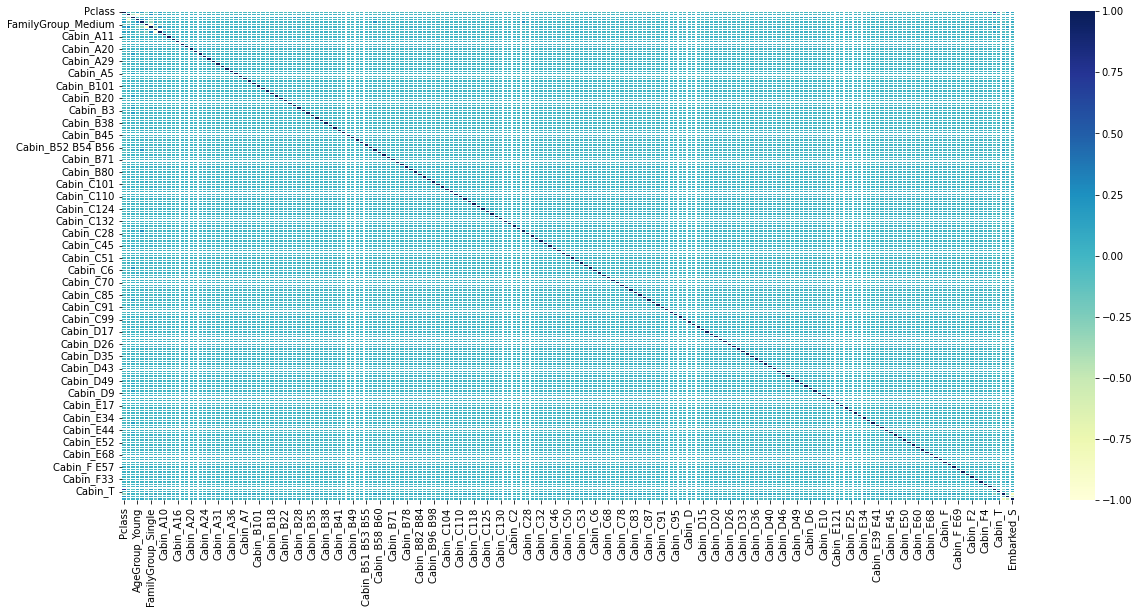

In [ ]:
corrmat = titan_encoded_features.corr()
  
f, ax = plt.subplots(figsize =(20, 9))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [ ]:
# Droppinbg some unnecesary encoded features

titan_encoded_features.drop(['Sex_male', 'Cabin_Not Present'], axis = 1, inplace = True)
titan_encoded_features.head(5)

KeyError: ignored

In [ ]:
#Scaling the independent features:
scaler = StandardScaler()
scaler.fit(titan_encoded_features)
X = scaler.fit_transform(titan_encoded_features)

Modeling

In [ ]:
#Splitting the transformed data back into training and testing sets:
titan_train_final = X[:891]
titan_test_final = X[891:]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(titan_train_final, y_train, test_size = 0.20, random_state = 42) # test-train: 80-20 split

ValueError: ignored

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_acc = accuracy_score(y_test, lr.predict(X_test))

print(f"Training Accuracy of Logistic Regression is {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Test Accuracy of Logistic Regression is {lr_acc}")

print(f"Confusion Matrix : \n {confusion_matrix(y_test, lr.predict(X_test))}")
print(f"Classification Report : \n {classification_report(y_test, lr.predict(X_test))}")

Training Accuracy of Logistic Regression is 0.8623595505617978
Test Accuracy of Logistic Regression is 0.776536312849162
Confusion Matrix : 
 [[82 23]
 [17 57]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.78      0.80       105
           1       0.71      0.77      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179



In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix : \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report : \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.8820224719101124
Test Accuracy of Decision Tree Classifier is 0.7821229050279329 

Confusion Matrix : 
[[90 15]
 [24 50]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       105
           1       0.77      0.68      0.72        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [ ]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix : \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report : \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 0.8820224719101124
Test Accuracy of Random Forest Classifier is 0.7877094972067039 

Confusion Matrix : 
[[95 10]
 [28 46]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.90      0.83       105
           1       0.82      0.62      0.71        74

    accuracy                           0.79       179
   macro avg       0.80      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179



In [ ]:
gb = GradientBoostingClassifier() #
gb.fit(X_train, y_train)

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix : \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report : \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 0.8693820224719101
Test Accuracy of Gradient Boosting Classifier is 0.7988826815642458 

Confusion Matrix : 
[[93 12]
 [24 50]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       105
           1       0.81      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix : \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report : \n {classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XgBoost is 0.8384831460674157
Test Accuracy of XgBoost is 0.8044692737430168 

Confusion Matrix : 
[[92 13]
 [22 52]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



Comparing the Models

In [ ]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier',
             'Gradient Boosting Classifier', 'XgBoost'],
    'Score' : [lr_acc, dtc_acc, rd_clf_acc, gb_acc, xgb_acc]
})

models["Score"] = (models["Score"] * 100).round(2)

models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,XgBoost,80.45
3,Gradient Boosting Classifier,79.89
2,Random Forest Classifier,78.77
1,Decision Tree Classifier,78.21
0,Logistic Regression,77.65


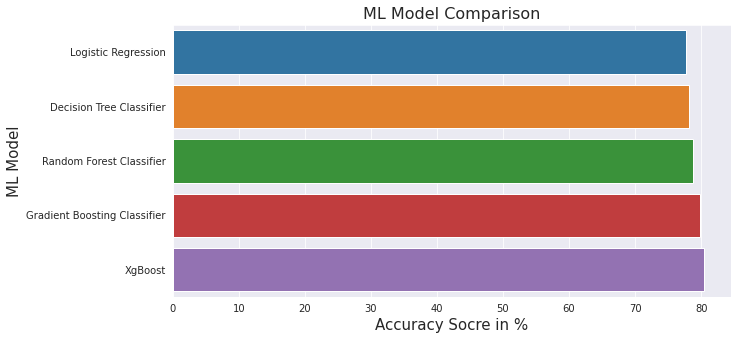

In [ ]:
plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Score', y = 'Model', data = models)

plt.xlabel('Accuracy Socre in %', fontsize = 15)
plt.ylabel('ML Model', fontsize = 15)

plt.title('ML Model Comparison', fontsize = 16)

plt.show()

In [ ]:
xgb_prediction = xgb.predict(titan_test_final) 
prediction = pd.DataFrame(xgb_prediction)
submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = prediction
submission.to_csv('Submission.csv', index = False)